# Battlefly Simulator scratch work


In [1]:
import numpy as np
from enum import Enum, auto
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import random
import importlib
# importlib.reload(module)

In [2]:
from battlefly import Battlefly

In [3]:
from mods import get_weapon, get_utility

In [4]:
bf1 = Battlefly(get_weapon("autocannon", 1), 
                get_weapon("autocannon", 1), 
                get_utility("ceramo_armor", 1),
                get_utility("force_shield_at", 1))
bf2 = Battlefly(get_weapon("howitzer", 1), 
                get_weapon("micro_rocket_pods", 1), 
                get_utility("auto_reloaders", 1),
                get_utility("boosters_thrusters", 1))

In [5]:
import parser
importlib.reload(parser)

<module 'parser' from '/Users/SunnyNie/Documents/Programming/games/battlefly/parser.py'>

In [27]:
def fight_battleflies(bf1, bf2, detailed=False):
    status={"shield1":[bf1.shield], 
            "hull1":[bf1.hull], 
            "shield2":[bf2.shield], 
            "hull2":[bf2.hull], 
            "time":[0]}
    about = {"bf1":bf1.get_name(), "bf2":bf2.get_name()}
    bf1.aim_at_enemy(bf2)
    bf2.aim_at_enemy(bf1)
    while bf1.hull>0 and bf2.hull>0:
        
        # print(bf1.reloading_for())
        # print(bf2.reloading_for())
        wait = min(bf1.reloading_for(), bf2.reloading_for())
        # print(f"waiting for {wait/1e3}s")
        bf1.fast_forward_utilities(wait)
        bf2.fast_forward_utilities(wait)
        bf1.fast_forward_weapons(wait)
        bf2.fast_forward_weapons(wait)
        if detailed:
            status["shield1"].append(bf1.shield)
            status["hull1"].append(bf1.hull)
            status["shield2"].append(bf2.shield)
            status["hull2"].append(bf2.hull)
            status["time"].append(status["time"][-1]+wait)
        # print(f"{status['time'][-1]/1e3} ====== new round =======")

    if bf1.hull > 0:
        bf1.won_battle()
        bf2.lost_battle()
    else:
        bf2.won_battle()
        bf1.lost_battle()
    bf1.reset_stats()
    bf2.reset_stats()
    if detailed: return status, about

In [28]:
bf1.evasion_chance

0.05

In [29]:
bf1.w1.enemy

In [30]:
s, a = fight_battleflies(bf1, bf2, True)

In [31]:
df = pd.DataFrame(s)
# df.drop(["time"], axis=1)
df = df/1e3
df = df.set_index(["time"])

df[df < 0] = None
df = df.fillna(value=0, limit=1)
df.shield1 += df.hull1[0]
df.shield2 += df.hull2[0]

In [32]:
bf1.shield

250000.0

In [33]:
df

,shield1,hull1,shield2,hull2
time,,,,
0.000,650.000,400.0,600.0,400.0
2.000,650.000,400.0,522.0,400.0
3.650,538.402,400.0,525.3,400.0
4.000,539.277,400.0,448.0,400.0
6.000,544.277,400.0,400.0,380.5
7.300,451.527,400.0,NaN,380.5
7.301,400.000,396.5,NaN,380.5
8.000,NaN,396.5,NaN,328.5
10.000,NaN,396.5,NaN,276.5


(0.0, 629.175)

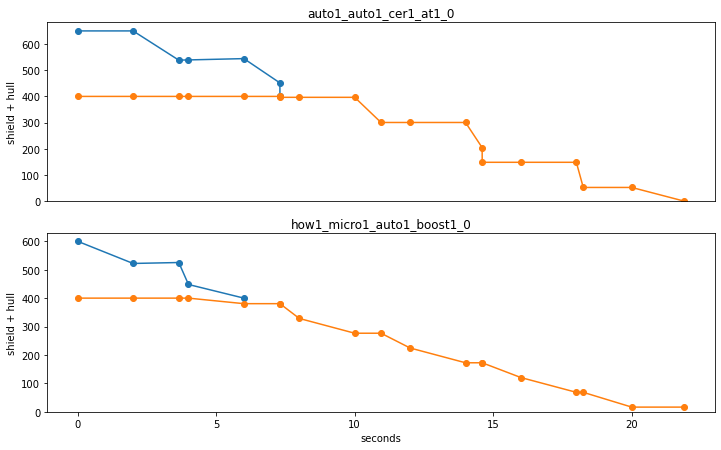

In [34]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=2)
fig.tight_layout()

ax[0].set_title(a["bf1"])
ax[0].set_ylabel("shield + hull")
ax[0].plot(df.shield1, '-o')
ax[0].plot(df.hull1, '-o')
ax[0].axes.get_xaxis().set_visible(False)

ax[1].set_title(a["bf2"])
ax[1].set_ylabel("shield + hull")
ax[1].plot(df.shield2, '-o')
ax[1].plot(df.hull2, '-o')
ax[1].set_xlabel("seconds")



ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)

In [35]:
df

,shield1,hull1,shield2,hull2
time,,,,
0.000,650.000,400.0,600.0,400.0
2.000,650.000,400.0,522.0,400.0
3.650,538.402,400.0,525.3,400.0
4.000,539.277,400.0,448.0,400.0
6.000,544.277,400.0,400.0,380.5
7.300,451.527,400.0,NaN,380.5
7.301,400.000,396.5,NaN,380.5
8.000,NaN,396.5,NaN,328.5
10.000,NaN,396.5,NaN,276.5


In [15]:
s

{'shield1': [250000.0,
  250000.0,
  4226000.0,
  4226000.0,
  11178000.0,
  59058000.0,
  59058000.0,
  65010000.0,
  65010000.0,
  65010000.0,
  69962000.0,
  101842000.0,
  101842000.0],
 'hull1': [400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000],
 'shield2': [250000.0,
  161000,
  2402,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098],
 'hull2': [400000,
  400000,
  400000,
  380500,
  380500,
  221902,
  202402,
  202402,
  103603,
  64603,
  64603,
  64603,
  -93995],
 'time': [0,
  2000,
  4000,
  6000,
  7763,
  8000,
  10000,
  11526,
  12000,
  14000,
  15289,
  15527,
  16000]}

In [12]:
import parser as p
from battlefly import Battlefly, Weapon, Utility
from effects import WEAPON, UTILITY, TRAIT

In [ ]:
Weapon(